In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [47]:
diam = pd.read_csv('../cleaned-data/01-diamonds-train-cl.csv').drop(columns='id')
diam_test = pd.read_csv('../cleaned-data/01-diamonds-test-cl.csv').drop(columns='id')

In [19]:
display(diam.head())
diam.describe()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.78,3,5,0,61.5,58.0,5.93,5.98,3.66,3446
1,0.31,4,7,1,60.8,56.0,4.37,4.32,2.64,732
2,0.30,4,5,1,62.3,54.0,4.30,4.34,2.69,475
3,1.04,4,6,2,62.0,58.0,6.54,6.46,4.03,9552
4,0.65,4,1,1,61.4,55.0,5.58,5.62,3.44,1276


,carat,cut,color,clarity,depth,table,x,y,z,price
count,40345.000000,40345.000000,40345.000000,40345.000000,40345.000000,40345.000000,40345.000000,40345.000000,40345.000000,40345.000000
mean,0.797699,2.905936,4.406519,2.524129,61.749721,57.449421,5.730824,5.734808,3.537958,3931.902243
std,0.474309,1.115415,1.700667,1.839947,1.427728,2.234087,1.121767,1.151536,0.695039,3994.318832
min,0.200000,0.000000,1.000000,0.000000,43.000000,43.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,2.000000,3.000000,1.000000,61.000000,56.000000,4.710000,4.720000,2.910000,952.000000
50%,0.700000,3.000000,4.000000,3.000000,61.800000,57.000000,5.690000,5.710000,3.520000,2397.000000
75%,1.040000,4.000000,6.000000,4.000000,62.500000,59.000000,6.540000,6.540000,4.030000,5317.000000
max,5.010000,4.000000,7.000000,7.000000,79.000000,95.000000,10.740000,58.900000,8.060000,18823.000000


In [13]:
diam_corr = diam.corr()
diam_corr

,carat,cut,color,clarity,depth,table,x,y,z,price
carat,1.000000,-0.132754,-0.291382,-0.040854,0.023118,0.181725,0.976267,0.945757,0.968685,0.922345
cut,-0.132754,1.000000,0.018865,0.040908,-0.213022,-0.432025,-0.124552,-0.119245,-0.149094,-0.053086
color,-0.291382,0.018865,1.000000,0.011880,-0.044171,-0.026576,-0.270998,-0.262095,-0.273173,-0.173932
clarity,-0.040854,0.040908,0.011880,1.000000,-0.004216,-0.032344,-0.060480,-0.060030,-0.061368,-0.040825
depth,0.023118,-0.213022,-0.044171,-0.004216,1.000000,-0.299534,-0.028765,-0.032894,0.092482,-0.013307
table,0.181725,-0.432025,-0.026576,-0.032344,-0.299534,1.000000,0.195775,0.182559,0.154399,0.126545
x,0.976267,-0.124552,-0.270998,-0.060480,-0.028765,0.195775,1.000000,0.967143,0.985385,0.886168
y,0.945757,-0.119245,-0.262095,-0.060030,-0.032894,0.182559,0.967143,1.000000,0.960350,0.860499
z,0.968685,-0.149094,-0.273173,-0.061368,0.092482,0.154399,0.985385,0.960350,1.000000,0.876061
price,0.922345,-0.053086,-0.173932,-0.040825,-0.013307,0.126545,0.886168,0.860499,0.876061,1.000000


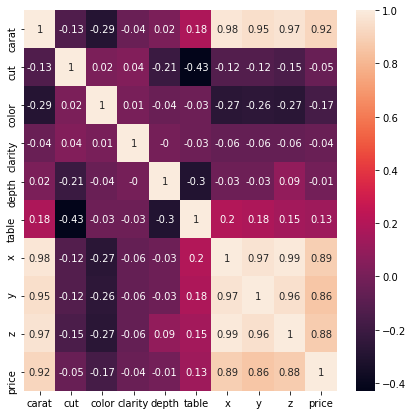

In [14]:
plt.figure(figsize=(7,7))
sns.heatmap(round(diam_corr,2), annot=True)

So a good first step would be to get rid of the x,y,z variables, since they have a very strong correlation among themselves, and with carat (i.e. weight)

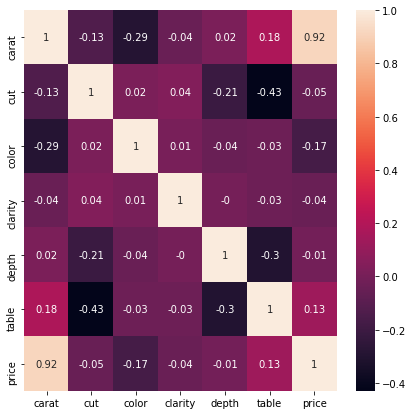

In [17]:
diam_red = diam.drop(columns=['x','y', 'z'])
diam_red_corr = diam_red.corr()
plt.figure(figsize=(7,7))
sns.heatmap(round(diam_red_corr,2), annot=True)

## Splitting the data

Another idea, is to split the dataset in two. We can see from the following price-distribution, that there are at least two groups of diamonds.

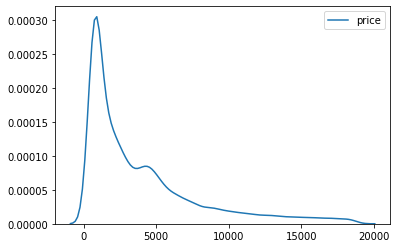

In [15]:
sns.kdeplot(diam.price)

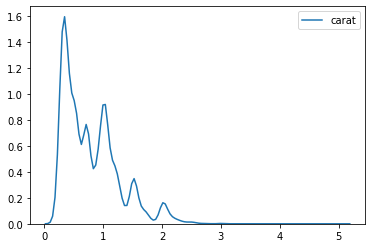

In [16]:
sns.kdeplot(diam.carat)

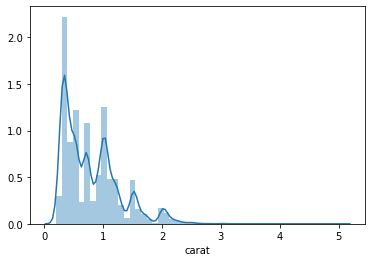

In [18]:
sns.distplot(diam.carat)

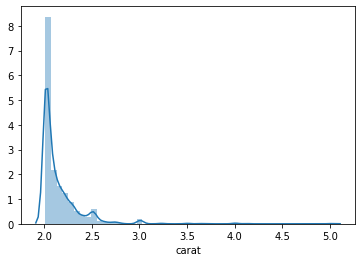

In [22]:
sns.distplot(diam.carat[diam.carat > 2])

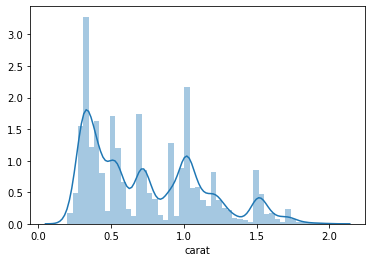

In [23]:
sns.distplot(diam.carat[diam.carat < 2])

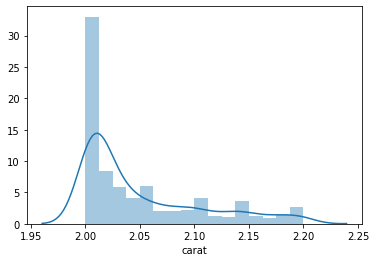

In [45]:
sns.distplot(diam.loc[(diam.carat >= 2) & (diam.carat <= 2.2)].carat)

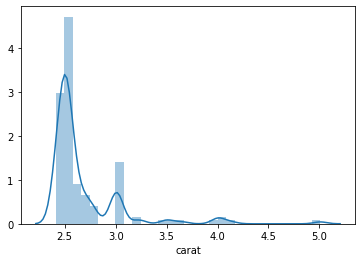

In [39]:
sns.distplot(diam.carat.loc[diam.carat > 2.4])

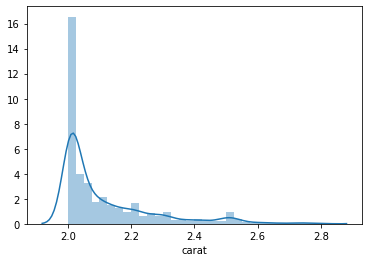

In [48]:
sns.distplot(diam.loc[(diam.carat >= 2.0) & (diam.carat <= 2.8)].carat)

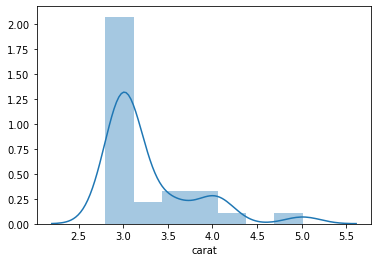

In [43]:
sns.distplot(diam.loc[(diam.carat >= 2.8) & (diam.carat <= 900)].carat)

A first idea would be to divide in two - below or equal 2 carats, and above two carats.

In [52]:
def splitFrame(df):
    df = df.drop(columns=['x','y','z'])
    dflow = diam.loc[diam.carat < 2.0]
    dfhigh = diam.loc[diam.carat >= 2.0]
    return dflow, dfhigh


train_low, train_high = splitFrame(diam)
test_low, test_high = splitFrame(diam_test)

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.78,3,5,0,61.5,58.0,5.93,5.98,3.66,3446
1,0.31,4,7,1,60.8,56.0,4.37,4.32,2.64,732
2,0.30,4,5,1,62.3,54.0,4.30,4.34,2.69,475
3,1.04,4,6,2,62.0,58.0,6.54,6.46,4.03,9552
4,0.65,4,1,1,61.4,55.0,5.58,5.62,3.44,1276
...,...,...,...,...,...,...,...,...,...,...
40340,0.50,4,6,0,61.9,56.0,5.09,5.12,3.16,1716
40341,0.33,4,7,4,61.8,56.0,4.40,4.44,2.73,781
40342,0.40,3,4,6,61.5,58.0,4.69,4.74,2.90,1123
40343,1.06,4,2,0,61.2,57.0,6.59,6.56,4.03,5651


In [54]:
for e in [train_low, train_high, test_low, test_high]:
    e.to_csv(f'../cleaned-data/03-{e}')

OSError: [Errno 36] File name too long: '../cleaned-data/03-       carat  cut  color  clarity  depth  table     x     y     z  price\n0       0.78    3      5        0   61.5   58.0  5.93  5.98  3.66   3446\n1       0.31    4      7        1   60.8   56.0  4.37  4.32  2.64    732\n2       0.30    4      5        1   62.3   54.0  4.30  4.34  2.69    475\n3       1.04    4      6        2   62.0   58.0  6.54  6.46  4.03   9552\n4       0.65    4      1        1   61.4   55.0  5.58  5.62  3.44   1276\n...      ...  ...    ...      ...    ...    ...   ...   ...   ...    ...\n40340   0.50    4      6        0   61.9   56.0  5.09  5.12  3.16   1716\n40341   0.33    4      7        4   61.8   56.0  4.40  4.44  2.73    781\n40342   0.40    3      4        6   61.5   58.0  4.69  4.74  2.90   1123\n40343   1.06    4      2        0   61.2   57.0  6.59  6.56  4.03   5651\n40344   1.01    2      3        3   63.4   55.0  6.35  6.29  4.01   3959\n\n[38730 rows x 10 columns]'